![Title](Images/cisco.png)

# Lab 3.1 Потехина Вера - Фт-370008

# Lab - Описательная статистика в Python 


### Содержание
<p>
<li>**Часть 1: Анализ данных**</li>
<li>**Часть 2: Визуализация данных**</li>
</p>
### Сценарий

В этой лаборатории вы импортируете набор данных в кадр Panda и генерируете описательную статистику из данных. Вы форматируете текстовые строки, сообщаете описательную статистику и генерируете график данных. Наконец, вы будете экспериментировать с параметрами графика, чтобы ознакомиться с графикой данных, используя `matplotlib.pyplot` libary.

### Ресурсы

* Raspberry Pi version 2 or higher
* 1 PC with network access for connection Raspberry Pi
* Python libraries: pandas and matplotlib.pyplot
* Datafiles: rpi_describe.csv

## Часть 1: Анализ данных

Целью первой части лаборатории является использование методов pandas для импорта набора данных и создания следующих описательных статистических данных:

1. размер выборки
2. мат.ожидание
3. медиана
4. стандартное отклонение
5. минимальный, максимальный и диапазон значений

#### Шаг 1. Настройка среды и импорт данных.

Во-первых, вы импортируете модули и настроите среду для отображения вывода "matplotlib" на странице ноутбука. Вы будете использовать `panda` для импорта данных из файла csv в dataframe. Вы будете работать с файлом, который содержит образцы контроля качества для ящиков с 20 унциями пищевого продукта. Данные используются для проверки точности машин, которые загружают ящики.

a) Импортировать модули и настроить среду.

In [2]:
# Code cell 1
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('qt5agg')

# given
%matplotlib inline

#required on some Jupyter Notebook installations

b) Импортируйте данные из файла `rpi_describe.csv`, используя метод pandas read_csv. Используйте 'data' в качестве имени блока данных.

In [50]:
# Code cell 2
# import the csv into the dataframe
data = pd.read_csv('rpi_describe.csv')


c) Убедитесь, что файл импортирован правильно, используя методы pandas `head` и` tail` для DataFrame.

In [51]:
# Code cell 3
# view the contents of the first five rows in the dataframe
data.head(10)

,weight
0,20.440
1,20.244
2,20.549
3,20.755
4,20.740
5,20.847
6,20.063
7,20.453
8,20.719
9,20.283


In [52]:
# Code cell 4
# view the contents of the last five rows in the dataframe
data.tail(7)

,weight
9993,20.233
9994,20.772
9995,20.419
9996,20.554
9997,20.768
9998,20.829
9999,20.667


Из вывода метода tail вы заметите, что в файле содержится 10 000 строк данных. Хотя это только один столбец, pandas обрабатывает этот файл очень эффективно.

#### Шаг 2: Используйте pandas для просмотра таблицы описательной статистики для файла.

pandas включает в себя ряд мощных методов отображения основных статистических данных в наборе данных.

a) Метод `dataframe.describe ()` отображает статистику для фрейма данных.

In [53]:
# Code cell 5
# use the describe method of the new dataframe to view the table of statistics
data.describe()

,weight
count,10000.000000
mean,20.499212
std,0.199874
min,19.752000
25%,20.365000
50%,20.500000
75%,20.635000
max,21.171000


b) Чтобы работать с округленными значениями для весов в datset, вы можете добавить новый столбец к данным для округленных значений. В Pandas доступ к столбцам осуществляется по их заголовкам. Чтобы создать новый столбец, имя нового столбца используется в кавычках в квадратных скобках в качестве индекса для фрейма данных. Метод `round ()` используется для округления значений в столбце веса, чтобы заполнить новый столбец округленными значениями.

In [54]:
# Code cell 6
# Add a new column to the dataframe and populate it with rounded weights.
data['rounded'] = data['weight'].round(3)

# Verify that values were added.
data.head(10)

,weight,rounded
0,20.440,20.440
1,20.244,20.244
2,20.549,20.549
3,20.755,20.755
4,20.740,20.740
5,20.847,20.847
6,20.063,20.063
7,20.453,20.453
8,20.719,20.719
9,20.283,20.283


c) Можно также заполнить столбец с вычисленными значениями. Например,

<pre> <code> dataframe ['c'] = dataframe ['a'] - dataframe ['b'] </code> </pre>

приведет к созданию столбца c в фрейме данных и заполняет его разницей между числовыми значениями в столбцах a и b.

Создайте новый столбец в dataframe, называемый «diff», и заполните этот столбец суммой веса над или под целевым значением в 20 унций. Используйте округленное значение для вычисления.

In [55]:
# Code cell 7
# Create the new column named "diff" and fill it with values.
data['diff'] = data['rounded'] - data['weight']

# Check the result.
data.head(10)

,weight,rounded,diff
0,20.440,20.440,0.000000e+00
1,20.244,20.244,0.000000e+00
2,20.549,20.549,0.000000e+00
3,20.755,20.755,0.000000e+00
4,20.740,20.740,0.000000e+00
5,20.847,20.847,3.552714e-15
6,20.063,20.063,0.000000e+00
7,20.453,20.453,0.000000e+00
8,20.719,20.719,0.000000e+00
9,20.283,20.283,0.000000e+00


#### Шаг 3: Отображение описательной статистики в тексте

На этом шаге вы создадите переменные, чтобы провести серию описательной статистики, а затем построить строки для отображения значений. Вы будете использовать следующее:

* `count()` 
* `mean()`
* `median()`
* `std()`
* `min()`
* `max()`

a) Используйте значения в округленном столбце блока данных. Создайте переменную для каждой статистики и вычислите диапазон значений с помощью `min ()` и `max ()` для вычисления диапазона значений.

In [56]:
# Code cell 8
# Create a variables to hold values for the dataset rounded column 
count = data['rounded'].count()
mean = data['rounded'].mean()
median = data['rounded'].median()
std = data['rounded'].std()
rng = data['rounded'].max() - data['rounded'].min()
#print(rng)


b) Чтобы построить строки, которые используют текст и переменные для представления статистики для набора данных, используйте метод `format ()` string, чтобы упростить вставку значений переменных в строки. Формат использует `{}` заполнители, чтобы указать, где значения переменных должны быть вставлены.

Построить предложения, такие как «Среднее для распределения ...» для каждой созданной переменной. Для последнего оператора включайте значения `min ()`, `max ()` и значения диапазона в тех же предложениях для практики с использованием нескольких заполнителей. Вы можете комбинировать и другие переменные в том же предложении.

In [57]:
# Code cell 9
# Create variables to hold your statements.
countstring = 'Количество значений в распределении равно {0}.'.format(count)
meanstring = 'Среднее значение в распределении равно {0}.'.format(mean)
medianstring = 'Серединное значение равно {0}.'.format(median)
stdstring = 'Стандартное отклонение равно {0}.'.format(std)
rangestring = 'Диапазон значений равен {0}.'.format(rng)

c) Используйте функцию `print` для вывода всех ваших операторов.

In [58]:
# Code cell 10
# Print all of your statements
print(countstring)
print(meanstring)
print(medianstring)
print(stdstring)
print(rangestring)

Количество значений в распределении равно 10000.
Среднее значение в распределении равно 20.4992125.
Серединное значение равно 20.5.
Стандартное отклонение равно 0.19987434032146773.
Диапазон значений равен 1.4190000000000005.


Посмотрите на выход для стандартного отклонения. Вы можете отформатировать номер, чтобы было легче понять результаты. Например, вы можете изменить выход стандартного отклонения, чтобы отображать только первые 2 цифры после десятичной точки.

Документ Python для форматирования строк:

https://docs.python.org/2/library/string.html

Эта ссылка содержит некоторые примеры форматирования:

https://mkaz.tech/code/python-string-format.html

In [59]:
# Code cell 11

# Format the standard deviation result to 2 decimal points
count = data.rounded.count()
stdstring = 'The standard deviation of the distribution is {:.2f}.'.format(std)
print(stdstring)

The standard deviation of the distribution is 0.20.


## Часть 2: Визуализация данных

В этой части упражнения вы создадите частотное распределение для каждого уникального значения в наборе данных.

#### Шаг 1. Создайте кадр данных, который содержит частоту подсчета для набора данных.

a) Создайте новый фреймворк данных, чтобы содержать частоту с использованием метода `value_counts ()`. Этот метод создает объект серии, а не фреймворк данных. Столбец индекса этой серии задается уникальными значениями ряда, при этом имя столбца автоматически устанавливается на 0. Чтобы преобразовать серию в DataFrame, вы можете использовать функцию `to_frame ()`. Кроме того, вызов метода `reset_index ()` в результирующем `DataFrame` преобразует предыдущий индексный столбец в новый столбец данных, имя которого автоматически устанавливается в` index`. Вы переименуете столбцы позже.



</font> Вы будете использовать `to_frame ()` с методами `reset_index ()`, чтобы создать рамку данных pandas из объекта серии.

Вы будете использовать округленный столбец из фреймворка данных с помощью метода `value_counts ()`. Пример:

<pre> <code> variable = dataframe ['columnName']. value_counts () </code> </pre>

In [60]:
# Code cell 12
# Create a variable called 'freq' to hold the weight values and their frequencies
freq = data['rounded'].value_counts()

# Convert the freq object to a data frame. Use to_frame().
freq = freq.to_frame().reset_index()


b) Используйте функцию `type ()` с именем переменной в качестве аргумента, чтобы убедиться, что `freq` не является объектом dataframe.

In [61]:
# Code cell 13
# Verify the type of the freq object.
type(freq)

pandas.core.frame.DataFrame

c) Используйте `head`, чтобы посмотреть новый блок данных. Столбцы в кадре данных не имеют четкого названия. Переименуйте их в «value» и «freq», используя атрибут столбцов в dataframe. Пример:
<pre><code> dataframe.columns = ['column1', 'column2'] </code></pre>

In [62]:
freq.head(4)

,index,rounded
0,20.448,32
1,20.502,30
2,20.554,29
3,20.445,29


In [63]:
# Code cell 14
# Rename the columns in the dataframe. 
freq.columns = ['value', 'freq'] 
# Verif the result.
freq.head(4)

,value,freq
0,20.448,32
1,20.502,30
2,20.554,29
3,20.445,29


#### Шаг 2: Настройте график распределения частот.

a) Модуль `matplotlib.pyplot` был импортирован как plt ранее в лаборатории. Методы из модуля используются для форматирования и отображения графика распределения частот для набора данных.

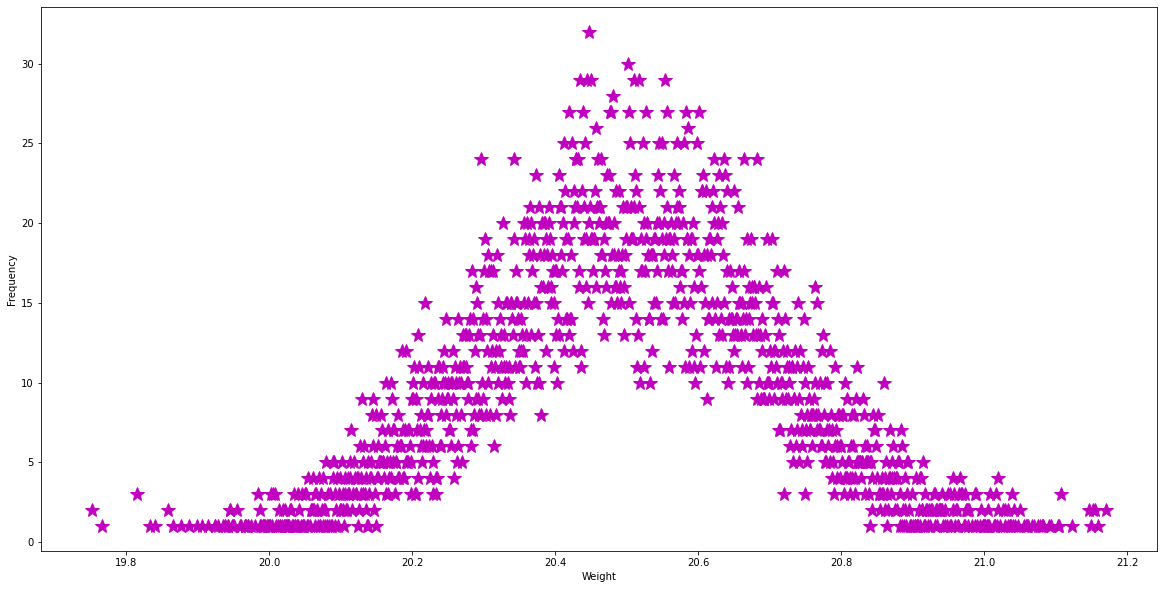

In [77]:
# Code cell 15

# Set a size for the graph
plt.figure(figsize=(20,10))

# Add axis labels
plt.ylabel('Frequency')
plt.xlabel('Weight')

# Plot the graph using a round symbol "o" of size 10
plt.plot(freq.value,freq.freq, "*", markersize = 15, color = 'm')

Частотный график значений похож на гауссовское распределение, сосредоточенное вокруг значения 20,5. В главе 4 вы узнаете, как эта форма вызвана как систематической, так и случайной ошибкой в производственных и / или измерительных системах.

b) Экспериментируйте с построением данных с различными размерами, маркерами, маркерами и цветами. Используйте приведенные ниже ссылки для значений. Вы также можете использовать пример выше, чтобы попробовать разные размеры фигуры.

маркеры http://matplotlib.org/api/markers_api.html

цвета http://matplotlib.org/api/colors_api.html

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>